# Pandas

### Value of Energy Cost Savings Program Savings for Businesses - FY2020

https://data.cityofnewyork.us/City-Government/Value-of-Energy-Cost-Savings-Program-Savings-for-B/bug8-9f3g

## Questions
1. How many different companies are represented in the data set?
2. What is the total number of jobs created for businesses in Queens?
3. How many different unique email domains names are there in the data set?
4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
5. Save your result for the previous question as a CSV file.

In [1]:
import pandas as pd

energy_save = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [2]:
energy_save

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,965843.58,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,3585.40,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South
447,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,Staten Island,NY,10303,Manufacturing,"Plumbing Fixtures, Parts & Supplies, Plumbers",...,20487.73,Staten Island,40.633518,-74.150942,501.0,49.0,239.0,5107122.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
448,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,Brooklyn,NY,11238,Manufacturing,"We make handcrafted furniture, surfaces, lighting",...,12287.32,Brooklyn,40.679518,-73.956819,308.0,35.0,305.0,3027572.0,3.011260e+09,Crown Heights North


In [3]:
energy_save.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [4]:
# 1. How many different companies are represented in the data set?
n_companies = energy_save['Company Name'].nunique()
print(n_companies)

439


In [5]:
# 2. What is the total number of jobs created for businesses in Queens?

# First show companies in each city; note different capitalizations, need to clean data
energy_save['City'].value_counts()

Brooklyn               170
Queens                  67
Long Island City        53
Bronx                   35
New York                32
BROOKLYN                10
Staten Island            9
BRONX                    6
Maspeth                  6
Lond Island City         6
College Point            5
LONG ISLAND CITY         5
QUEENS                   5
Jamaica                  5
Astoria                  3
NY                       3
NEW YORK                 3
Woodside                 3
Ridgewood                2
Flushing                 2
Ozone Park               2
Brookln                  2
Bronx,                   1
Brooklyn,                1
Queens Village           1
Brooklym                 1
Forest Hills             1
COLLEGE POINT            1
New YOrk                 1
RIDGEWOOD                1
L.I.C.                   1
bronx                    1
PORT MORRIS              1
GLENDALE                 1
BROOKLYN HEIGHT          1
Far Rockaway             1
INWOOD                   1
S

In [6]:
# Clean data
e_save_clean = energy_save.copy()

# Consolidate names and fix typos and 
e_save_clean['City'] = energy_save['City'].str.replace('L.I.C.', 'Long Island City', regex=True)
e_save_clean['City'] = e_save_clean['City'].str.replace('Lond Island City', 'Long Island City', regex=True)

e_save_clean['City'] = e_save_clean['City'].str.replace('Brooklym', 'Brooklyn', regex=True)
e_save_clean['City'] = e_save_clean['City'].str.replace('Brookln', 'Brooklyn', regex=True)

e_save_clean['City'] = e_save_clean['City'].str.replace('NY', 'New York', regex=True)

# Remove commas
e_save_clean['City'] = e_save_clean['City'].str.replace(r'[^\w\s]+', '',regex=True)

# Standardize capitalization
e_save_clean['City'] = e_save_clean['City'].apply(lambda x: x.title())

In [7]:
# Cleaned list
e_save_clean['City'].value_counts()

Brooklyn               184
Queens                  72
Long Island City        65
Bronx                   43
New York                39
Staten Island            9
College Point            6
Maspeth                  6
Jamaica                  5
Astoria                  3
Ridgewood                3
Woodside                 3
Ozone Park               2
Flushing                 2
Far Rockaway             1
Queens Village           1
Glendale                 1
Inwood                   1
Forest Hills             1
Brooklyn Height          1
Port Morris              1
Springfield Gardens      1
Name: City, dtype: int64

In [8]:
# Find Queens
e_save_clean[energy_save['City'] == 'Queens'] 

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
15,538-540 West 35 Corp,Richard Silver,tankman220@aol.com,2127366618,11-42 46th Road,Queens,NY,11101,Manufacturing,"steel, wood & cement tanks",...,56744.11,Queens,40.745510,-73.949497,402.0,26.0,7.0,4436616.0,4.000560e+09,Hunters Point-Sunnyside-West Maspeth
19,A & L Scientific Corp.,Anthony Vicari,service@alscientific.com,7187568100,88-05 76th Avenue,Queens,NY,11385,Manufacturing,fabricates and services biotech medical equipment,...,35540.16,Queens,40.707402,-73.862139,405.0,30.0,637.0,4094396.0,4.038560e+09,Glendale
20,"A.K.S. International, Inc",Tomislav nNgalo,tnogalo@aksinternational.com,332313,37-04 19th Avenue,Queens,NY,11105,Manufacturing,metal contracting & fabricator of metal products,...,20691.63,Queens,40.779184,-73.900755,401.0,22.0,12301.0,4436970.0,4.008120e+09,Steinway
37,ALLE PROCESSING CORP.,Sam HOLLANDER,halbycpa@alleprocessing.com,7188942000,54-58 56TH DR. & 5820-5880 MAURICE,Queens,NY,11378,Manufacturing,MANUFACTURER,...,3645626.13,Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,"American Torque, Inc.",Robert McCarthy,Amtorq@gmail.com,7185262433,105-22 150th Street,Queens,NY,11435,Manufacturing,mfg torque converters and related parts,...,73037.27,Queens,40.696796,-73.801885,412.0,28.0,204.0,4589555.0,4.100620e+09,Jamaica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,"USTA NATIONAL TENNIS CENTER, INC.",DANIEL ZAUSNER,crowley@usta.com,7187606237,FLUSHING MEADOWS-CORONA PARK,Queens,NY,11368,Commercial,ADMINISTRATIVE OFFICES,...,1849004.70,Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,"WATER LILIES FOOD, INC.",Peter Lee,peterlee@waterliliesfood.com,7187778899,45-10 19TH AVENUE,Queens,NY,11105,Manufacturing,MANUFACTURER,...,927036.80,Queens,40.776128,-73.896413,401.0,22.0,12301.0,4014854.0,4.007750e+09,Steinway
435,Weapons Specialist Ltd,Richard Washburn,ryder@weaponspecialists.com,2129417696,47-40 Metropolitan Ave,Queens,NY,11385,Wholesale/Warehouse/Distribution,"Studio Property Rental, Motion Picture business",...,165002.94,Queens,40.713695,-73.918990,405.0,34.0,539.0,4548477.0,4.033750e+09,Ridgewood
436,"Werwaiss & Co., Inc.",John Wersaiss,JW@werwaissandco.com,9173187800,"22-15 43rd Ave, Ste 300",Queens,NY,11101,Commercial,Real estate management,...,3335.97,Queens,40.749987,-73.944311,402.0,26.0,19.0,4005067.0,4.004260e+09,Hunters Point-Sunnyside-West Maspeth


In [9]:
# 2. Number of jobs created for businessess in Queens
e_save_clean[e_save_clean['City'] == "Queens"]["Job created"].sum()

90.0

In [10]:
# 3. How many different unique email domains names are there in the data set?
e_save_clean['company email'].nunique()

420

In [11]:
# 4. Considering only NTAs with at least 5 listed businesses, what 
# is the average total savings and the total jobs created for each NTA?
NTAs = energy_save["NTA"].value_counts()
NTAs

Hunters Point-Sunnyside-West Maspeth                     75
Sunset Park West                                         48
Queensbridge-Ravenswood-Long Island City                 16
park-cemetery-etc-Brooklyn                               15
Mott Haven-Port Morris                                   14
                                                         ..
Breezy Point-Belle Harbor-Rockaway Park-Broad Channel     1
Eastchester-Edenwald-Baychester                           1
Washington Heights South                                  1
Port Richmond                                             1
North Side-South Side                                     1
Name: NTA, Length: 79, dtype: int64

In [12]:
# NTAs with at last 5 businesses
NTAs_over5 = NTAs[NTAs >= 5]
NTAs_over5

Hunters Point-Sunnyside-West Maspeth                75
Sunset Park West                                    48
Queensbridge-Ravenswood-Long Island City            16
park-cemetery-etc-Brooklyn                          15
Mott Haven-Port Morris                              14
Greenpoint                                          14
Hunts Point                                         13
Carroll Gardens-Columbia Street-Red Hook            11
East Williamsburg                                   11
Bushwick South                                      10
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill    10
Crown Heights North                                  9
Battery Park City-Lower Manhattan                    9
Maspeth                                              9
East New York                                        9
Manhattanville                                       9
Steinway                                             7
College Point                                        7
Springfiel

In [13]:
# Another way to get NTA counts
e_save_clean['NTA'].value_counts().loc[lambda x : x >=5]

Hunters Point-Sunnyside-West Maspeth                75
Sunset Park West                                    48
Queensbridge-Ravenswood-Long Island City            16
park-cemetery-etc-Brooklyn                          15
Mott Haven-Port Morris                              14
Greenpoint                                          14
Hunts Point                                         13
Carroll Gardens-Columbia Street-Red Hook            11
East Williamsburg                                   11
Bushwick South                                      10
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill    10
Crown Heights North                                  9
Battery Park City-Lower Manhattan                    9
Maspeth                                              9
East New York                                        9
Manhattanville                                       9
Steinway                                             7
College Point                                        7
Springfiel

In [14]:
# Calculate Average Total Savings and Total Jobs created
# Tried to rename columns with groupby, but doesn't work
mean_save = e_save_clean.groupby(by='NTA')['Total Savings'].mean().rename_axis(['Average Total Savings'])
total_jobs = e_save_clean.groupby(by='NTA')['Job created'].sum().rename_axis(['Total Jobs Created'])

# Concatenate 
NTA_df = pd.concat([mean_save, total_jobs], axis=1)

# Rename columns
NTA_df = NTA_df.rename(columns={'Total Savings' : 'Average Total Savings', 'Job created' : 'Total Jobs Created'})
NTA_df

,Average Total Savings,Total Jobs Created
Astoria,11409.986667,0.0
Baisley Park,21522.740000,0.0
Battery Park City-Lower Manhattan,469890.796667,0.0
Bedford,62113.343333,0.0
Bensonhurst West,-379.470000,0.0
...,...,...
Whitestone,62038.306667,10.0
Williamsburg,23570.080000,0.0
Windsor Terrace,78573.320000,0.0
Woodside,5625.736667,0.0


In [15]:
NTAs_over5

Hunters Point-Sunnyside-West Maspeth                75
Sunset Park West                                    48
Queensbridge-Ravenswood-Long Island City            16
park-cemetery-etc-Brooklyn                          15
Mott Haven-Port Morris                              14
Greenpoint                                          14
Hunts Point                                         13
Carroll Gardens-Columbia Street-Red Hook            11
East Williamsburg                                   11
Bushwick South                                      10
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill    10
Crown Heights North                                  9
Battery Park City-Lower Manhattan                    9
Maspeth                                              9
East New York                                        9
Manhattanville                                       9
Steinway                                             7
College Point                                        7
Springfiel

In [16]:
# Solution to Part 4: Filter for NTAs > 5
# This seems a bit round about!
over5_df = NTA_df.groupby(NTAs_over5).apply(lambda x:x)
over5_df

,Average Total Savings,Total Jobs Created
Battery Park City-Lower Manhattan,469890.796667,0.0
Bushwick South,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
College Point,17159.372857,2.0
Crown Heights North,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
East New York,48433.093333,15.0
East Williamsburg,13990.626364,0.0
Greenpoint,9753.649286,0.0
Hunters Point-Sunnyside-West Maspeth,23931.398933,0.0


In [17]:
# 5. Save your result for the previous question as a CSV file.
pd.DataFrame.to_csv(over5_df, 'Savings_by_NTA.csv')

# Plotting

Using the same data set and results that you were working with in the pandas action items section (Day 4), create a
* scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
* histogram of the log of the average total savings.
* line plot of the total jobs created for each month.

In [18]:
import matplotlib 
import matplotlib.pyplot as plt

import numpy as np

In [19]:
jobs = over5_df['Total Jobs Created']
save = over5_df['Average Total Savings']

Text(0.5, 1.0, 'Total Jobs Created and Avereage Total Savings')

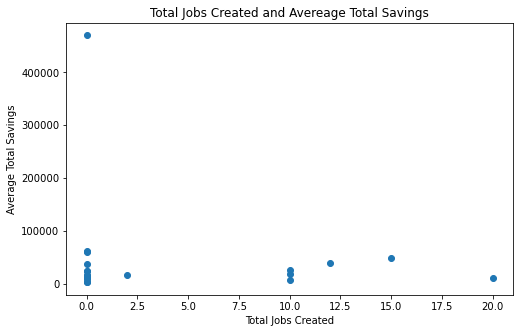

In [20]:
# Scatter plot of jobs created versus average savings
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(jobs, save)
ax.set_xlabel('Total Jobs Created')
ax.set_ylabel('Average Total Savings')
ax.set_title('Total Jobs Created and Avereage Total Savings')

Text(0.5, 1.0, 'Total Jobs Created and Average Total Savings Log Plot')

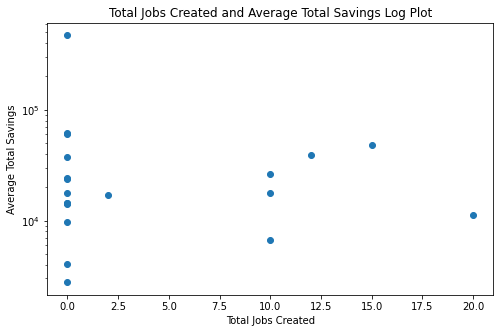

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(jobs, save)
ax.set_yscale('log')
ax.set_xlabel('Total Jobs Created')
ax.set_ylabel('Average Total Savings')
ax.set_title('Total Jobs Created and Average Total Savings Log Plot')

### Plot and Log Plot side by side

Text(0.5, 1.0, 'Log Plot')

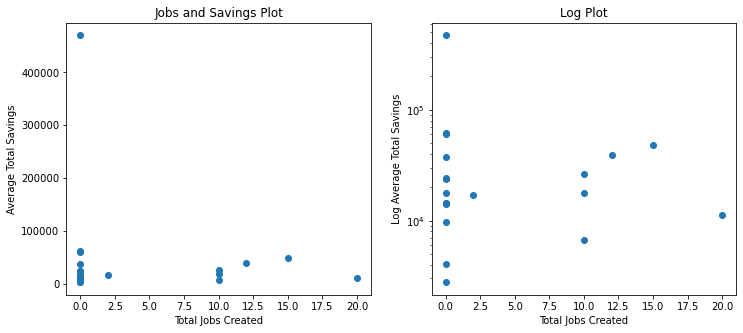

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].scatter(jobs, save)
axs[0].set_xlabel('Total Jobs Created')
axs[0].set_ylabel('Average Total Savings')
axs[0].set_title('Jobs and Savings Plot')

axs[1].scatter(jobs, save)
axs[1].set_yscale('log')
axs[1].set_xlabel('Total Jobs Created')
axs[1].set_ylabel('Log Average Total Savings')
axs[1].set_title('Log Plot')

(array([17.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2760.88888889,  49473.87966667,  96186.87044444, 142899.86122222,
        189612.852     , 236325.84277778, 283038.83355556, 329751.82433333,
        376464.81511111, 423177.80588889, 469890.79666667]),
 <BarContainer object of 10 artists>)

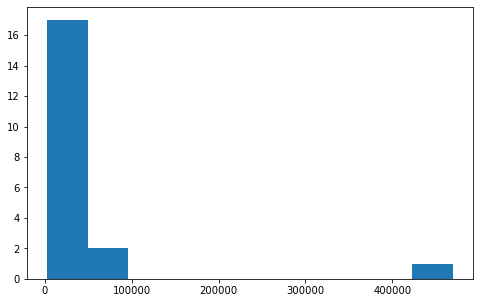

In [23]:
# Histogram of savings for NTAs > 5
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(save)

In [24]:
log_save = np.log(save)
log_save

Battery Park City-Lower Manhattan                   13.060256
Bushwick South                                      10.171239
Carroll Gardens-Columbia Street-Red Hook            10.099769
College Point                                        9.750300
Crown Heights North                                  8.303083
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill    11.001272
East New York                                       10.787939
East Williamsburg                                    9.546143
Greenpoint                                           9.185397
Hunters Point-Sunnyside-West Maspeth                10.082947
Hunts Point                                         10.577605
Manhattanville                                       7.923308
Maspeth                                              8.803617
Mott Haven-Port Morris                               9.789419
Queensbridge-Ravenswood-Long Island City            11.032156
SoHo-TriBeCa-Civic Center-Little Italy              10.524441
Springfi

Text(0.5, 1.0, 'Histogram of Log Average Total Savings')

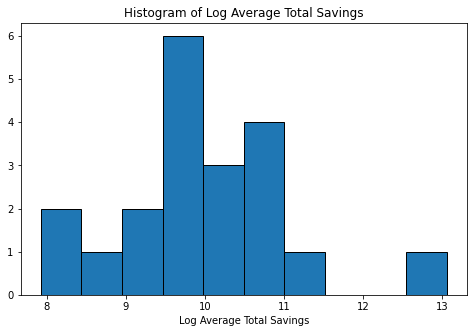

In [25]:
# Histogram of log savings
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(log_save, edgecolor='black')
ax.set_xlabel('Log Average Total Savings')
ax.set_title('Histogram of Log Average Total Savings')

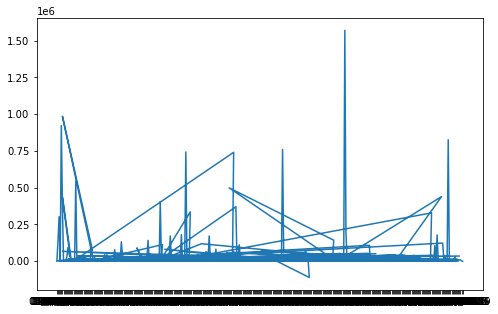

In [26]:
# Line plot of savings by date - plotting the data as is, need to sort by date
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(energy_save['Effective Date'], energy_save['Total Savings'])

<AxesSubplot:xlabel='Effective Date'>

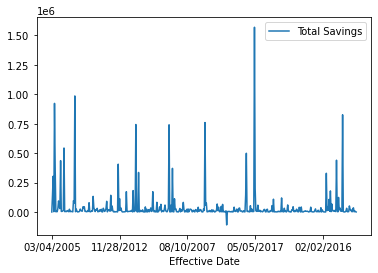

In [27]:
# Line plot of total jobs by date
energy_save.plot(x='Effective Date', y='Total Savings')

In [28]:
# Date needs to change to date string to group by month
# Date is object, need to convert to datetime object
energy_save['Effective Date']

0      03/04/2005
1      04/02/2008
2      01/05/2015
3      02/03/2020
4      06/30/2017
          ...    
445    12/09/2008
446    12/05/2017
447    08/03/2018
448    01/26/2016
449    10/03/2019
Name: Effective Date, Length: 450, dtype: object

In [29]:
# A lot of null values
energy_save[energy_save['Job created'].notnull()]['Effective Date']

29     03/05/2004
37     06/28/2007
95     11/06/2007
120    02/03/2005
137    03/01/2006
325    05/02/2007
353    04/10/2007
414    02/05/1993
432    06/08/2007
433    07/02/2007
445    12/09/2008
Name: Effective Date, dtype: object

In [30]:
import datetime

In [31]:
date_df = e_save_clean[['Job created', 'Effective Date']]
date_df

,Job created,Effective Date
0,NaN,03/04/2005
1,NaN,04/02/2008
2,NaN,01/05/2015
3,NaN,02/03/2020
4,NaN,06/30/2017
...,...,...
445,10.0,12/09/2008
446,NaN,12/05/2017
447,NaN,08/03/2018
448,NaN,01/26/2016


In [32]:
# Q. How to get rid of error?
date_df['Effective Date'] = pd.to_datetime(date_df['Effective Date'])

<ipython-input-32-964a2e205a4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['Effective Date'] = pd.to_datetime(date_df['Effective Date'])


In [33]:
# Now dates are datetime objects
date_df['Effective Date']

0     2005-03-04
1     2008-04-02
2     2015-01-05
3     2020-02-03
4     2017-06-30
         ...    
445   2008-12-09
446   2017-12-05
447   2018-08-03
448   2016-01-26
449   2019-10-03
Name: Effective Date, Length: 450, dtype: datetime64[ns]

In [34]:
# set Effective Date to index for groupby
date_df = date_df.set_index(pd.DatetimeIndex(date_df["Effective Date"]))

In [35]:
# drop Effective Date 
date_df = date_df.drop(['Effective Date'], axis=1)

In [36]:
date_df

,Job created
Effective Date,
2005-03-04,NaN
2008-04-02,NaN
2015-01-05,NaN
2020-02-03,NaN
2017-06-30,NaN
...,...
2008-12-09,10.0
2017-12-05,NaN
2018-08-03,NaN


In [37]:
# Effective Date shows end of each month
g = date_df.groupby(pd.Grouper(freq='M'))
g.sum()

,Job created
Effective Date,
1993-02-28,15.0
1993-03-31,0.0
1993-04-30,0.0
1993-05-31,0.0
1993-06-30,0.0
...,...
2020-03-31,0.0
2020-04-30,0.0
2020-05-31,0.0


Text(0, 0.5, 'Jobs created')

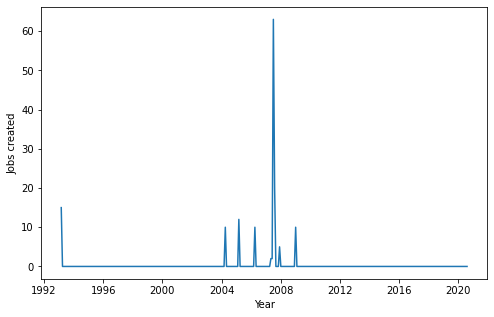

In [38]:
# Line plot of total jobs created each month
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(g['Job created'].sum())
ax.set_xlabel('Year')
ax.set_ylabel('Jobs created')